In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option("display.max_columns",None)

# **1. Latar Belakang**

*Software as a Service* (SaaS) adalah model layanan perangkat lunak yang menawarkan produk berbasis cloud kepada segment pelanggan, seperti SMB, Enterprise, dan Strategic, SaaS juga sering kali memberikan kebijakan dalam harga, seperti diskon, hal ini bertujuan untuk menarik perhatian banyak pelanggan untuk membelinya dan juga untuk meningkatkan penjualannya, akan tetapi kebijakan harga yang kurang tepat dapat berdampak negatif pada profit.

selain itu setiap segment memiliki fitur dan kebutuhan yang berbeda-beda, oleh karena itu penting untuk memahami masing-masing segment dengan lebih baik, agar kita dapat merancang strategi yang lebih baik dalam mengelola setiap segment, sehingga mampu untuk meningkatkan penjualan dan profit.

# **2. Pernyataan Masalah**

Perusahaan SaaS ingin mengetahui diskon yang kita berikan apakah berdampak positif atau negatif terhadap profit, dan juga segment pelanggan mana yang paling menguntungkan dan juga daerah region mana yang paling menguntungkan. informasi ini akan membantu perusahaan untuk mengelola diskon yang lebih efektif untuk mendapatkan profit yang optimal.

Sebagai seorang data analyst, saya akan mencoba menjawab beberapa pertanyaaan berikut:

1. Bagaimana pengaruh dan dampak diskon terhadap profit dan sales?
- Analisis: Analisis korelasi antara diskon dengan profit dan sales, dan mengidenfitifikasi diskon mana yang menghasilkan profit negatif,untuk memahami strategi yang efektif dalam memberikan diskon

2. Segment pelanggan mana yang memberikan dampak besar dan kecil terhadap profit, dan juga bagaimana keadaannya setiap region?
- Analisis: Membandingkan total dan rata-rata profit per-segment dan juga untuk setiap region.

3. Apakah ada tren musiman dalam volume penjualan dan profit,dan bagaimana strateginya?
- Analisis: Analisis profit dan sales berdasarkan bulan dan tahun untuk mengetahui kapan periode profit dan sales tertinggi dan terendah

# **3. Penjelasan Kolom**

1. ID Baris: Pengidentifikasi unik untuk setiap transaksi.
2. ID Pesanan: Pengidentifikasi unik untuk setiap pesanan.
3. Tanggal Pemesanan: Tanggal pemesanan dilakukan.
4. Kunci Tanggal: Representasi numerik dari tanggal pemesanan (YYYYMMDD).
5. Nama Kontak: Nama orang yang melakukan pemesanan.
6. Negara: Negara tempat pemesanan dilakukan.
7. Kota : Kota tempat pemesanan dilakukan.
8. Wilayah: Wilayah tempat pemesanan dilakukan.
9. Subwilayah: Subwilayah tempat pemesanan dilakukan.
10. Pelanggan : Nama perusahaan yang melakukan pemesanan.
11. ID Pelanggan: Pengidentifikasi unik untuk setiap pelanggan.
12. Industri: Industri tempat pelanggan berada.
13. Segmen : Segmen pelanggan (UKM, Strategis, Enterprise, dll).
14. Produk : Produk yang dipesan.
15. Lisensi: Kunci lisensi untuk produk.
16. Penjualan: Jumlah total penjualan untuk transaksi.
17. Kuantitas : Jumlah total item dalam transaksi.
18. Diskon: Diskon yang berlaku pada transaksi.
19. Profit : Keuntungan dari transaksi.

# **4. Load Dataset** 

In [2]:
saas = pd.read_csv("SaaS-Sales.csv")
saas.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# **6. Data Cleaning**

## **A. Check Missing Values & Duplicate**

In [3]:
saas.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
saas.duplicated().sum()

0

*Tidak ditemukan kolom yang kosong dan duplikat dalam data ini*

## **B. Check Column Formats and Optimizing Columns**
1. Kolom "Order Date" formatnya masih dalam bentuk type object, maka harus diubah formatnya ke type datetime,karena kolom ini berisikan tanggal,       
   konversi ini bertujuan untuk mempermudah analisis tren berdasarkan waktu.

2. Menghapus kolom "Date Key", karena kolom yang berisikan tanggal sudah tersedia di kolom "Order Date", dan tidak dibutuhkan dalam analisis ini

In [5]:
saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

*mengubah format kolom "Order Date" dan menghapus kolom "Date key"*

In [6]:
saas["Order Date"] = pd.to_datetime(saas["Order Date"])
saas.drop(columns="Date Key",inplace=True)

*mengecek apakah format kolom "Order Date" sudah berubah?*

In [7]:
saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

## **C. Check Outliers**

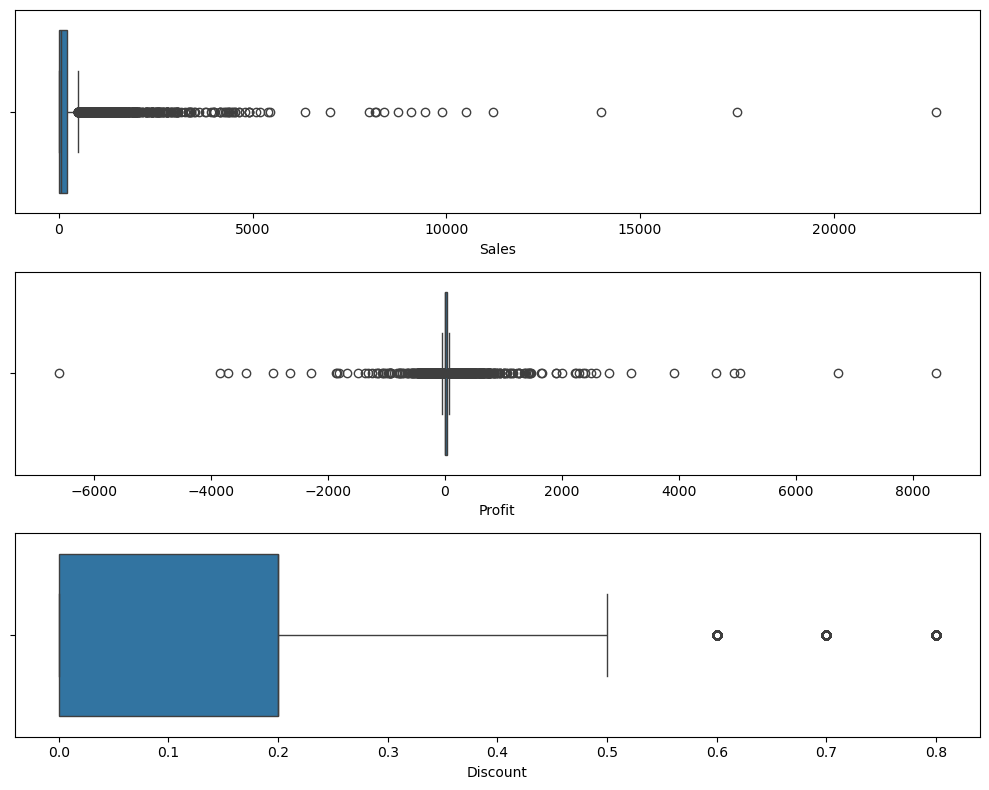

In [8]:
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
sns.boxplot(data=saas,x="Sales")

plt.subplot(3,1,2)
sns.boxplot(data=saas,x="Profit")

plt.subplot(3,1,3)
sns.boxplot(data=saas,x="Discount")

plt.tight_layout()

In [9]:
saas[saas["Sales"]>13000]


,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,2698,EMEA-2020-145317,2020-03-18,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.48,6,0.5,-1811.0784
6826,6827,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.95,5,0.0,8399.9760
8153,8154,AMER-2023-140151,2023-03-24,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.96,4,0.0,6719.9808


In [10]:

saas[(saas["Profit"]<-4000)| (saas["Profit"]>6000)]

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
6826,6827,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760
7772,7773,AMER-2022-108196,2022-11-26,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780
8153,8154,AMER-2023-140151,2023-03-24,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808


outlier tidak dihapus, karena tidak ada data tersebut penting dan masuk akal, adapun outlier pada nilai sales yang sangat tinggi tapi menghasilkan profit negatif, itu disebabkan oleh pemberian diskon yang terlalu besar, Situasi ini menjadi penting untuk dianalisis lebih lanjut agar dapat merancang strategi diskon yang lebih efektif dan memastikan profitabilitas tetap terjaga.

## **D. Add New Columns**

1. Month: menambahkan kolom "Month" yang diambil dari kolom "Order Date",agar lebih mudah untuk menganalisis tren waktu
2. Year: menambahkan kolom "Year" yang diambil dari kolom "Order Date",agar lebih mudah untuk menganalisis tren waktu
2. Discount Range: untuk mempermudah analisis strategi diskon yang lebih efektif 
3. Profit Status: menambahkan kolom Profit Status yang diambil dari profit, ada 2 status ,"Profitable"(jika profit > 0 ) dan "Unprofitable"(Jika profit <=0), hal ini untuk mempermudah analisis diskon berapa yang profitnya tidak menguntungkan 

In [11]:

saas['Month'] = saas['Order Date'].dt.month

saas['Year'] = saas['Order Date'].dt.year

def discount_to_category(x):
    if x >= 0 and x <= 0.1:
        return "0-10%"
    elif x > 0.1 and x <= 0.2:
        return "10-20%"
    elif x > 0.2 and x <= 0.3:
        return "20-30%"
    elif x > 0.3 and x <= 0.4:
        return "30-40%"
    elif x > 0.4 and x <= 0.5:
        return "40-50%"
    else:
        return "50-80%"
    
saas["Discount Range"] = saas["Discount"].apply(discount_to_category)

def profit_status(x):
    if x > 0 :
        return "Profitable"
    else:
        return "Unprofitable"

saas["Profit Status"] = saas["Profit"].apply(profit_status)

saas

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Month,Year,Discount Range,Profit Status
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,11,2022,0-10%,Profitable
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,11,2022,0-10%,Profitable
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,6,2022,0-10%,Profitable
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,10,2021,40-50%,Unprofitable
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,10,2021,10-20%,Profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,1,2020,10-20%,Profitable
9990,9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,2,2023,0-10%,Profitable
9991,9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,2,2023,10-20%,Profitable
9992,9993,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,2,2023,0-10%,Profitable


In [12]:
saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Contact Name    9994 non-null   object        
 4   Country         9994 non-null   object        
 5   City            9994 non-null   object        
 6   Region          9994 non-null   object        
 7   Subregion       9994 non-null   object        
 8   Customer        9994 non-null   object        
 9   Customer ID     9994 non-null   int64         
 10  Industry        9994 non-null   object        
 11  Segment         9994 non-null   object        
 12  Product         9994 non-null   object        
 13  License         9994 non-null   object        
 14  Sales           9994 non-null   float64       
 15  Quan

In [13]:
saas["Sales"].sum()


2297200.8603000003

In [14]:
saas["Profit"].sum()


286397.0217

# **7. Save Clean File To Excel**

In [15]:
saas.to_excel("SaaS-Sales-Cleaned.xlsx")

# **8. Data Visualization & Analysis**

## **1. Bagaimana pengaruh dan dampak diskon terhadap profit dan sales?**

In [16]:
saas[["Sales","Discount","Profit"]].describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


### A. Check Correlation

In [17]:
korelasiDPS = saas[["Discount","Profit","Sales"]].corr(method="spearman")
korelasiDPS

,Discount,Profit,Sales
Discount,1.000000,-0.543350,-0.056969
Profit,-0.543350,1.000000,0.518407
Sales,-0.056969,0.518407,1.000000


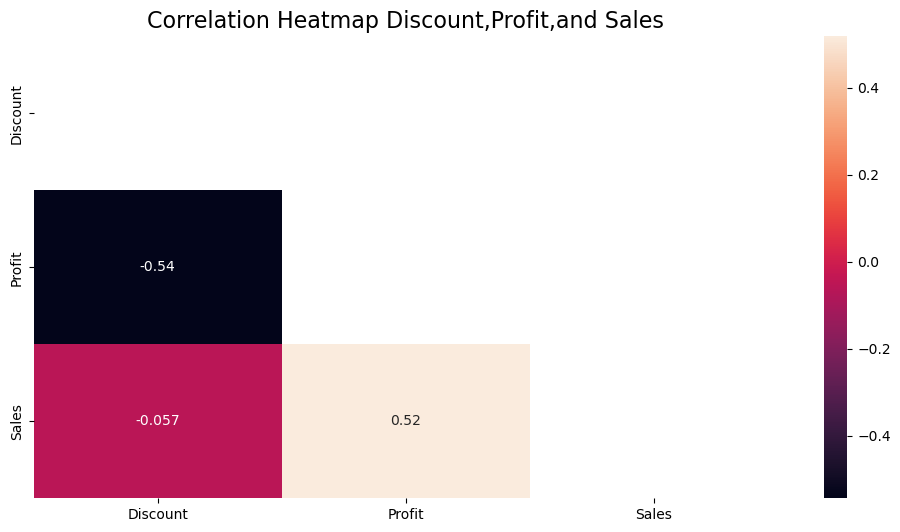

In [18]:
plt.figure(figsize=(12,6))
mask=np.triu(np.ones_like(korelasiDPS))
sns.heatmap(korelasiDPS,annot=True,mask=mask)
plt.title("Correlation Heatmap Discount,Profit,and Sales",fontsize=16)
plt.show()

> Correlation

- 0 - 0.2   : very weak
- 0.2 - 0.4 : weak
- 0.4 - 0.6 : moderate
- 0.6 - 0.9 : strong
- 0.9 - 1   : very strong


> korelasi diskon dengan profit: -0.54 (korelasi negatif moderat)
- peningkatan diskon cenderung berhubungan dengan penurunan profit, artinya semakin besar diskon yang diberikan maka semakin kecil profit yang dihasilkan 
> korelasi diskon dengan sales: -0.057 (korelasi negatif very weak)
- peningkatan diskon tidak terlalu mempengaruhi penjualan, artinya pemberian diskon tidak selalu meningkatkan penjualan.

### B. Checking profitable and unprofitable transactions

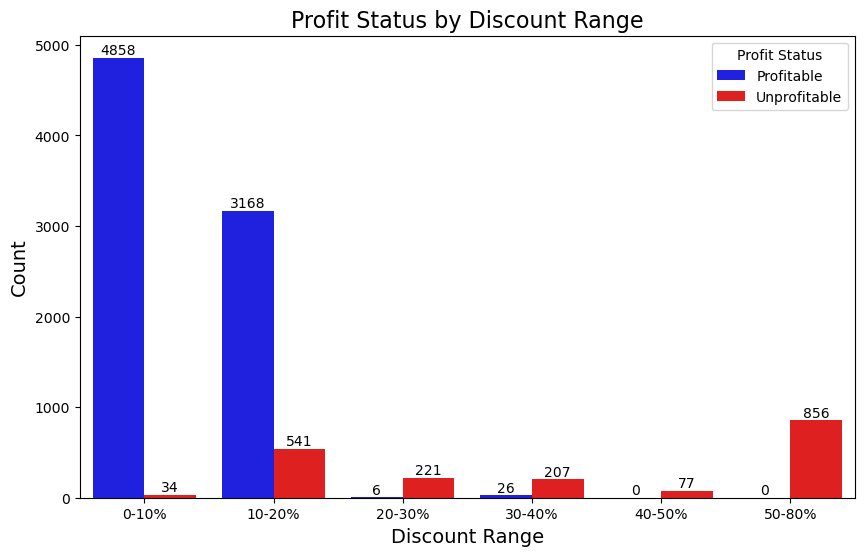

In [19]:
profit_counts = pd.crosstab(
    index = saas["Discount Range"], 
    columns = saas["Profit Status"]
).reset_index()

profit_counts = profit_counts.melt(
    id_vars="Discount Range", 
    var_name="Profit Status", 
    value_name="Count"
)

plt.figure(figsize=(10, 6))
x = sns.barplot(
    data=profit_counts,
    x="Discount Range",
    y="Count",
    hue="Profit Status",
    palette=["blue","red"]
)

for i in x.containers:
    plt.bar_label(i)

plt.title("Profit Status by Discount Range", fontsize=16)
plt.xlabel("Discount Range",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()


> insight
- Transaksi paling menguntungkan berada di rentang diskon (0-10%),dengan total "Profitable" sebanyak 4.858 kali, hal ini terjadi karena discount yang di berikan itu kecil sehingga profit tetap terjaga

- Pada rentang diskon (10-20%) juga masih menghasilkan keuntungan, dengan total "Profitable" sebanyak 3.168 kali, namun mulai ada resiko didalamnya yaitu sebanyak 541 kali "Unprofitable", pada rentang diskon ini profit masih terjaga.

- Pada rentang diskon (20-30%) dan (30-40%) terjadi transaksi yang merugikan,hal ini terjadi karena diskon yang diberikan mungkin terlalu tinggi sehingga profit tidak terjaga.

- Transaksi paling merugikan berada pada rentang diskon > 40% , tidak ada satupun transaksi yang profitable, hal ini terjadi karena diskon yang di berikan itu terlalu tinggi, sehingga berpotensi mengalami kerugian yang sangat tinggi juga.


jadi pada rentang diskon 0-20% Profit masih tetap terjaga meskipun ada resiko Unprofitable didalamnya, akan tetapi resiko Unprofitable nya sangatlah kecil, hal ini terjadi karena diskon yang diberikan masih standar(rendah) sehingga profit tetap terjaga, dan diskon pada rentang 0-20% masih tetap aman untuk digunakan,
namun ketika diskon yang diberikan > 20% cenderung menghasilkan profit negatif yang tinggi,hal ini terjadi karena pemberian diskon terlalu tinggi, dan ini membuat profit tidak terjaga, dan diskon pada rentang yang > 20% tidak aman untuk digunakan.

> recommendation
- oleh karena itu strategi yang efektif untuk pemberian diskon ialah pada rentang 0-20%, dan jangan terlalu sering memberikan diskon yang > 20%

*selanjutnya kita lihat segment manakah yang paling banyak diberi diskon*⇊ 

#### B1.  Identifying which segments are frequently given discounts 

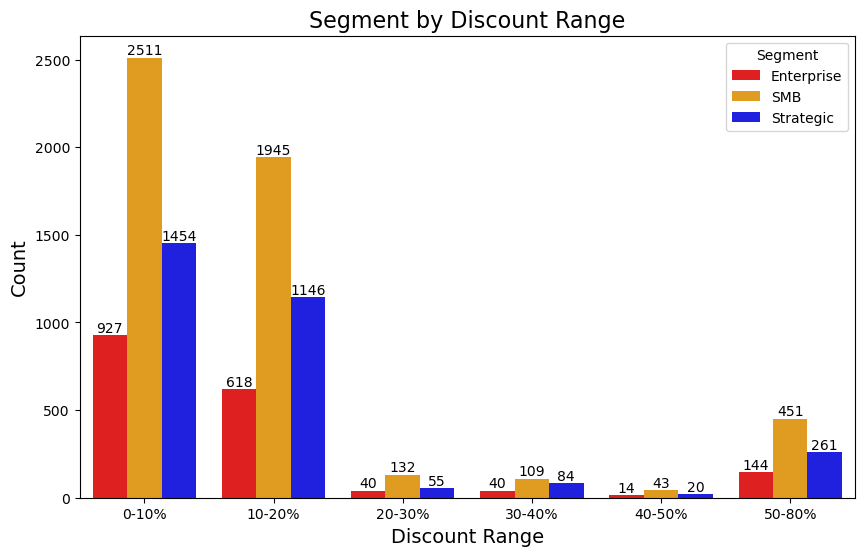

In [20]:
segment_counts = pd.crosstab(
    index = saas["Segment"],
    columns = saas["Discount Range"]).reset_index()

segment_counts = segment_counts.melt(
    id_vars="Segment",
    var_name="Discount Range",
    value_name="Count"
)
plt.figure(figsize=(10, 6))
y = sns.barplot(
    data=segment_counts,
    x="Discount Range",
    y="Count",
    hue="Segment",
    palette=["red","orange","blue"]
)

for i in y.containers:
    plt.bar_label(i)


plt.title("Segment by Discount Range", fontsize=16)
plt.xlabel("Discount Range",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()


> insight
- Segment SMB (Smaal Medium Business) mendapatkan diskon terbanyak dari semua rentang diskon, 
    - 0-10%: sebanyak 2511 kali 
    - 10-20%: sebanyak 1945 kali dst.
    dari 3 segment (SMB,Enterpise,Strategic) tersebut, hanya segment pelanggan SMB yang sering diberikan diskon, kemungkinan ini terjadi karena pelanggan SMB itu sensitif terhadap harga.
    
- Segment Enterprise mendapatkan diskon paling sedikit dari semua rentang diskon,
    - 0-10%: sebanyak 927 kali
    - 10-20% : sebanyak 618 kali dst.
    dari 3 segment (SMB,Enterpise,Strategic) tersebut, hanya segment pelanggan Enterprise yang jarang diberikan diskon, kemungkinan ini terjadi karena pelanggan Enterprise tidak bergantung pada diskon tapi lebih memperhatikan pada kualitas. 

*mari kita lihat apakah segment SMB (yang paling banyak diberikan diskon) menghasilkan profit yang tinggi*

#### B2. Proving whether the SMB segment is the most profitable

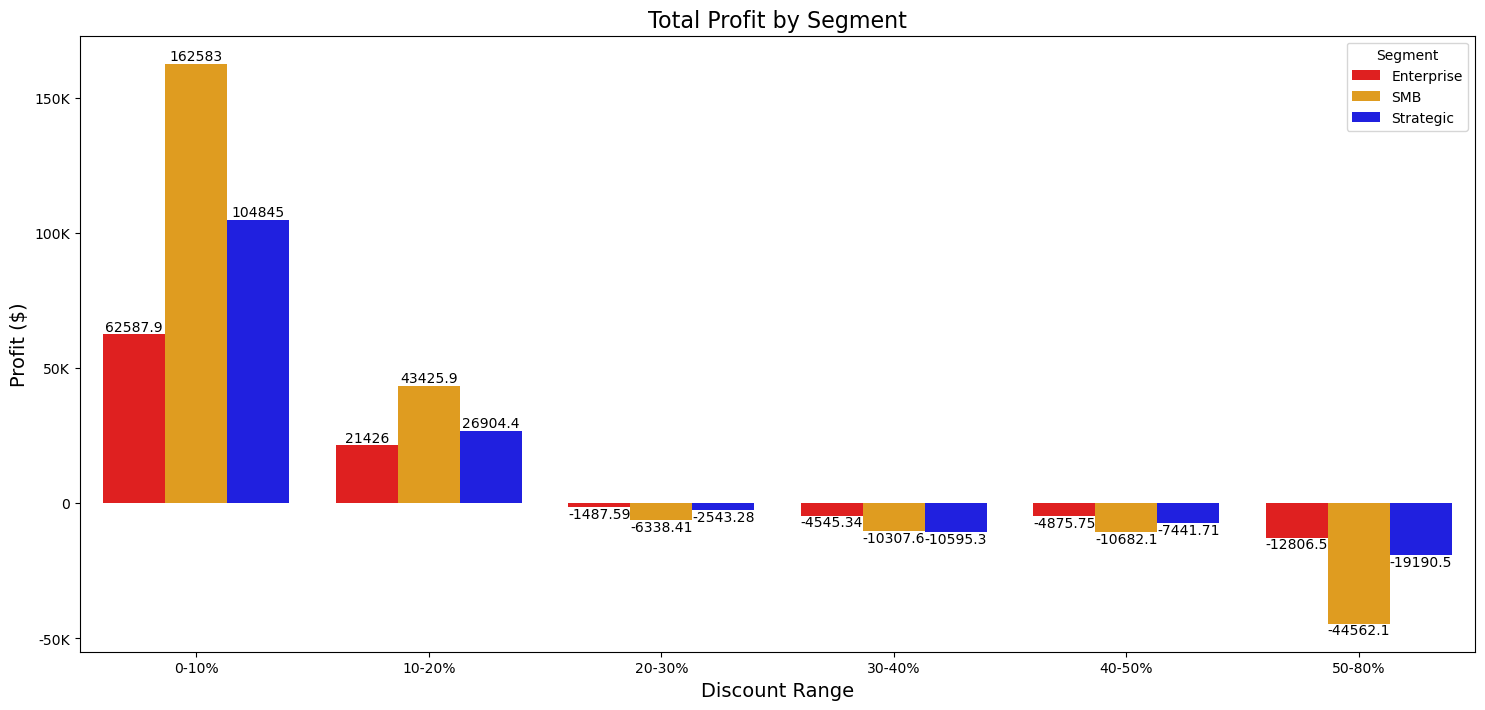

In [21]:
plt.figure(figsize=(18, 8))
profit_diskon_segmen = saas.groupby(["Segment","Discount Range"])[["Profit"]].sum()
z = sns.barplot(
    profit_diskon_segmen,
    x = "Discount Range",
    y = "Profit",
    hue= "Segment",
    palette=["red","orange","blue"]
)
for i in z.containers:
    z.bar_label(i)
plt.title("Total Profit by Segment",fontsize=16)
plt.xlabel("Discount Range",fontsize=14)
plt.ylabel("Profit ($)",fontsize=14)
plt.yticks(ticks=range(-50000,200000,50000), labels=["-50K","0","50K","100K","150K"])
plt.show()


> insight
- Profit selalu positif ketika berada di diskon 0-20% di semua segment, ketika diskon > 20% profit cenderung negatif secara signifikan.
- yang paling banyak menghasilkan profit ialah segment pelanggan SMB, dan yang paling sedikit ialah segment pelanggan Enterprise, ini terbukti bahwa pemberian diskon yang banyak kepada segment pelanggan SMB ternyata menghasilkan profit yang tinggi.
- pada rentang diskon 50-80% mengalami kerugian yang sangat besar, hal ini disebabkan oleh pemberian diskon yang terlalu tinggi

> recommendation
- oleh karena itu kita harus fokus pemberian diskon itu hanya pada rentang diskon 0-20%
- jangan memberikan diskon pada rentang 50-80% karena dapat menghasilkan kerugian yang sangat besar

*mari kita lihat perbandingan antara Sales dan Profit berdasarkan Discount Range* ⇊

#### B3. The Impact of Discounts on Sales and Profit in Each Segment

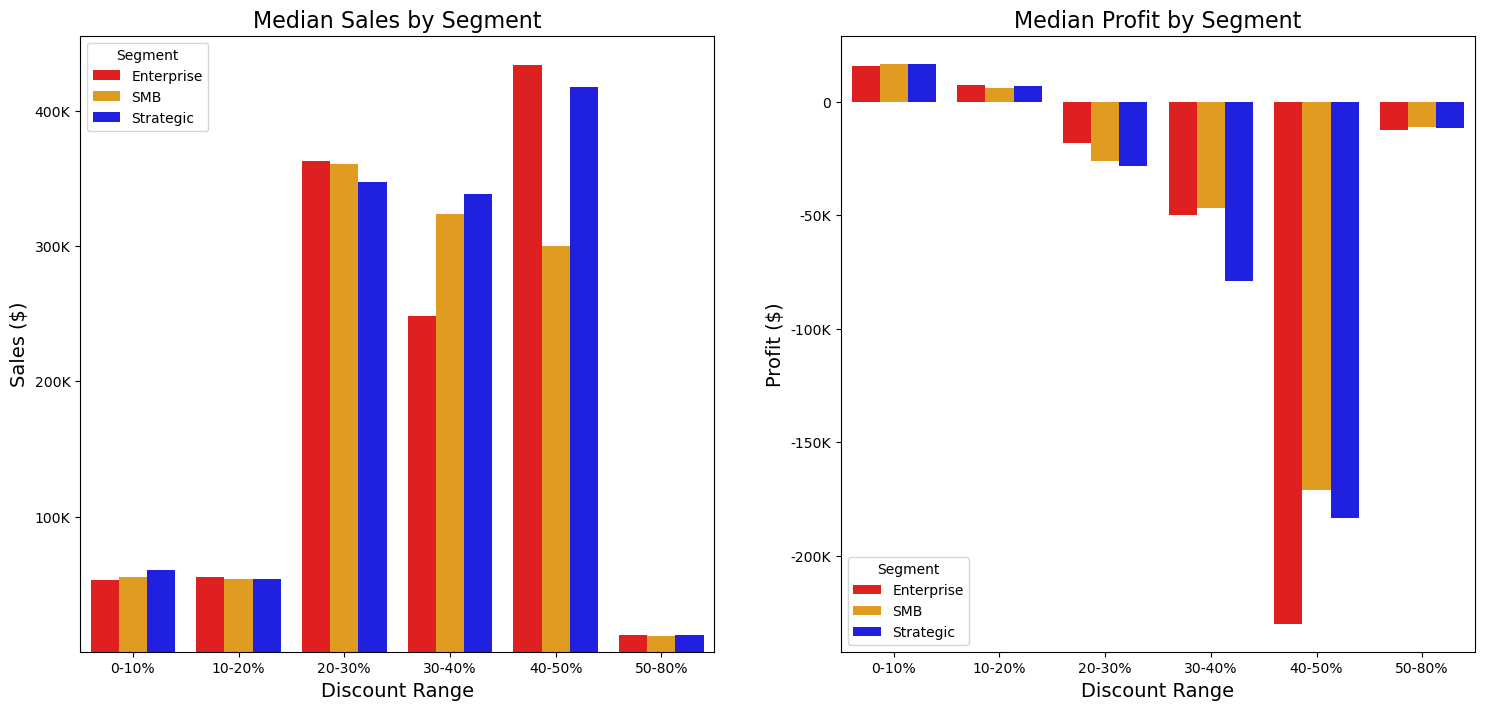

In [22]:
segment_sales_profit = saas.groupby(['Segment', 'Discount Range'])[["Profit","Sales"]].median().reset_index()

plt.figure(figsize=(18, 8))
plt.subplot(1,2,1)
a = sns.barplot(
    segment_sales_profit,
    x = "Discount Range",
    y = "Sales",
    hue = "Segment",
    palette=["red","orange","blue"]
)

plt.title("Median Sales by Segment",fontsize=16)
plt.xlabel("Discount Range", fontsize=14)
plt.ylabel("Sales ($)", fontsize=14)
plt.yticks(ticks=range(100,500,100), labels=["100K","200K","300K","400K"])

plt.subplot(1,2,2)
b = sns.barplot(
    segment_sales_profit,
    x = "Discount Range",
    y = "Profit",
    hue = "Segment",
    palette=["red","orange","blue"]
)
plt.title("Median Profit by Segment",fontsize=16)
plt.xlabel("Discount Range", fontsize=14)
plt.ylabel("Profit ($)", fontsize=14)
plt.yticks(ticks=range(-200,50,50), labels=["-200K","-150K","-100K","-50K","0"])

plt.show()

> insight 
- volume penjualan meningkat ketika pemberian diskonnya tinggi, akan tetapi ini membuat profit menjadi negatif karena diskon yang terlalu tinggi,
- volume penjualan tertinggi dan profit yang paling banyak negatif nya terdapat pada segment pelanggan "Enterprise" begitu juga dengan segment pelanggan "Strategic",  sebaiknya kita jangan terlalu sering memberikan diskon di atas 20% hanya karena ingin meningkatkan volume penjualan, tapi justru malah merugikan. 


> recommendation
- fokuskan penjualan untuk meningkatkan profit, bukan hanya volume penjualan saja 
- jika ingin memberi diskon, berilah pada rentang diskon 0-20%, karena pada diskon ini menghasilkan profit positif

*mari kita lihat rata-rata dari sales dan profit berdasarkan diskon range, apakah benar diskon yang diberikan pada rentang diskon 0-20% ini rata rata menguntungkan?* ⇊

### C. determining the most effective discount range

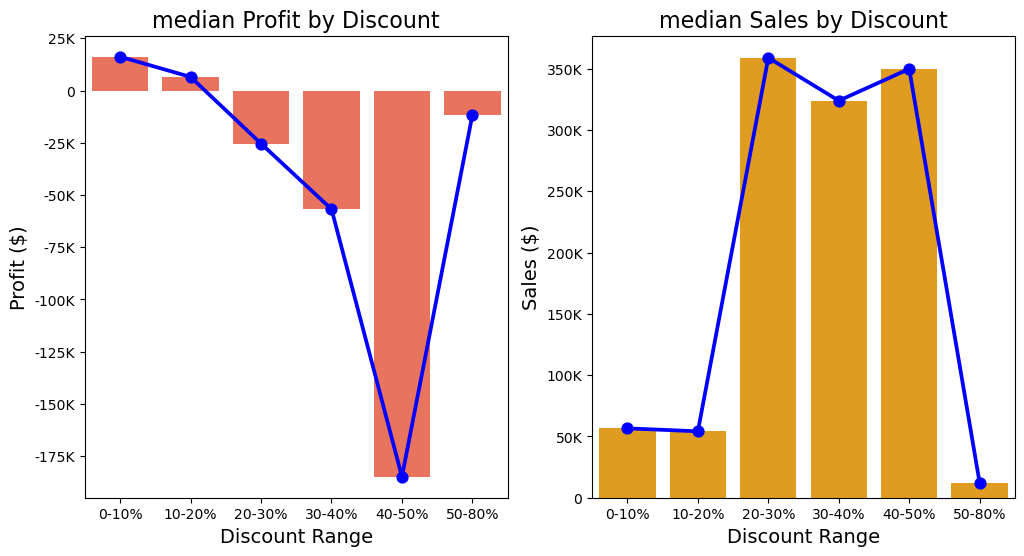

In [23]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(
    data=saas.sort_values('Discount Range'), 
    x="Discount Range", 
    y="Profit", 
    estimator="median",
    errorbar=None, 
    color="tomato"
)

sns.pointplot(
    data=saas.sort_values('Discount Range'),
    x="Discount Range",
    y="Profit",
    estimator="median",
    errorbar=None,
    color="blue"
)
plt.title("median Profit by Discount",fontsize=16)
plt.xlabel("Discount Range",fontsize=14)
plt.ylabel("Profit ($)",fontsize=14)
plt.yticks(ticks=range(-175,50,25), labels=["-175K","-150K","-125K","-100K","-75K","-50K","-25K","0","25K"])

plt.subplot(1,2,2)
sns.barplot(
    data=saas.sort_values('Discount Range'),
    x="Discount Range",
    y="Sales",
    estimator="median",
    errorbar=None,
    color="orange"
)
sns.pointplot(
    data=saas.sort_values('Discount Range'),
    x="Discount Range",
    y="Sales",
    estimator="median",
    errorbar=None,
    color="blue"
)
plt.title("median Sales by Discount",fontsize=16)
plt.xlabel("Discount Range", fontsize=14)
plt.ylabel("Sales ($)", fontsize= 14)
plt.yticks(ticks=range(0,400,50),labels=["0","50K","100K","150K","200K","250K","300K","350K"])
plt.show()

> insight: 

- Diagram menunjukan ketika diskon dari rentang 0-20% masih menghasilkan profit positif, 
Namun ketika diskon dari rentang 20%-50%, profit berubah menjadi negatif secara signifikan, hal ini kemungkinan disebabkan oleh diskon yang diberikan terlalu tinggi, sehingga profit yang dihasilkan menjadi negatif

- Jadi pemberian diskon yang lebih besar akan berdampak buruk terhadap profit, oleh karena itu kita perlu strategi diskon yang efektif untuk menghindari kerugian yang besar

- volume penjualan pada rentang diskon 0-20% lebih rendah dibandingkan dengan rentang diskon 20-50% dan juga ketika diskon pada rentang 50-80% mengalami penjualan yang sangat rendah, hal ini menunjukan bahwa pemberian diskon tidak selalu meningkatkan volume penjualan.

Jadi pemberian diskon tidak terlalu mempengaruhi volume penjualan,oleh karena itu kita fokuskan strategi diskon yang efektif ini hanya untuk meningkatkan profit.

> recommendation
- sebaiknya pemberian diskon jangan melebihi 20% karena dalam diskon tersebut dapat menghasilkan profit negatif meskipun penjualannya sangat tinggi
- lakukan pemberian diskon pada rentang 0-20%

### D. **Conclusion and Recommendations**

> Conclusion
- rata-rata diskon yang menghasilkan profit positif ialah diskon pada rentang (0-10%) dan (0-20%), selebihnya profitnya negatif
- rata-rata diskon yang menghasilkan volume penjualan meningkat ialah pada diskon yang > 20%, tapi menghasilkan kerugian yang sangat besar
- segment yang paling banyak diberi diskon ialah segment SMB, dan terbukti hanya segment SMB yang profit dan volume penjualannya tidak terlalu parah
- segment yang volume penjualannya meningkat paling banyak, akan tetapi menghasilkan kerugian yang besar terdapat pada segment (Enterprise, dan Strategic)
- diskon yang diberikan tidak terlalu mempengaruhi volume penjualan (pada rentang diskon (50-80%) mengalami penjualan yang sangat sedikit)
- diskon yang diberikan akan mempengaruhi profit, jika diskon terlalu tinggi maka tingkat kerugian akan lebih besar
- hubungan negatif: 
    - korelasi antara diskon dengan profit ialah negatif moderat, yang artinya semakin besar diskon yang diberikan maka semakin kecil profit yang dihasilkan
    - korelasi antara diskon dengan sales ialah negatif very weak, yang artinya pemberian diskon tidak akan selalu meningkatkan penjualan

> Recommendation 
- fokus pada peningkatan profit, jangan fokus pada peningkatan volume penjualan.
- jangan terlalu sering memberi diskon di atas 20% meskipun hal ini membuat volume penjualan meningkat, akan tetapi hal ini juga membuat profit cenderung negatif signifikan.
- usahakan pemberian diskon tetap pada rentang 0-20%
- fokuskan pemberian diskon kepada segment pelanggan SMB
- jangan terlalu sering memberi diskon kepada segment pelanggan Enterprise, karena biasanya mereka tidak terlalu fokus pada harga, tapi pada kualitas.

## **2. Segment pelanggan mana yang memberikan dampak besar dan kecil terhadap profit, dan juga bagaimana keadaannya setiap region?**

### A. Highest sales and profit by segment

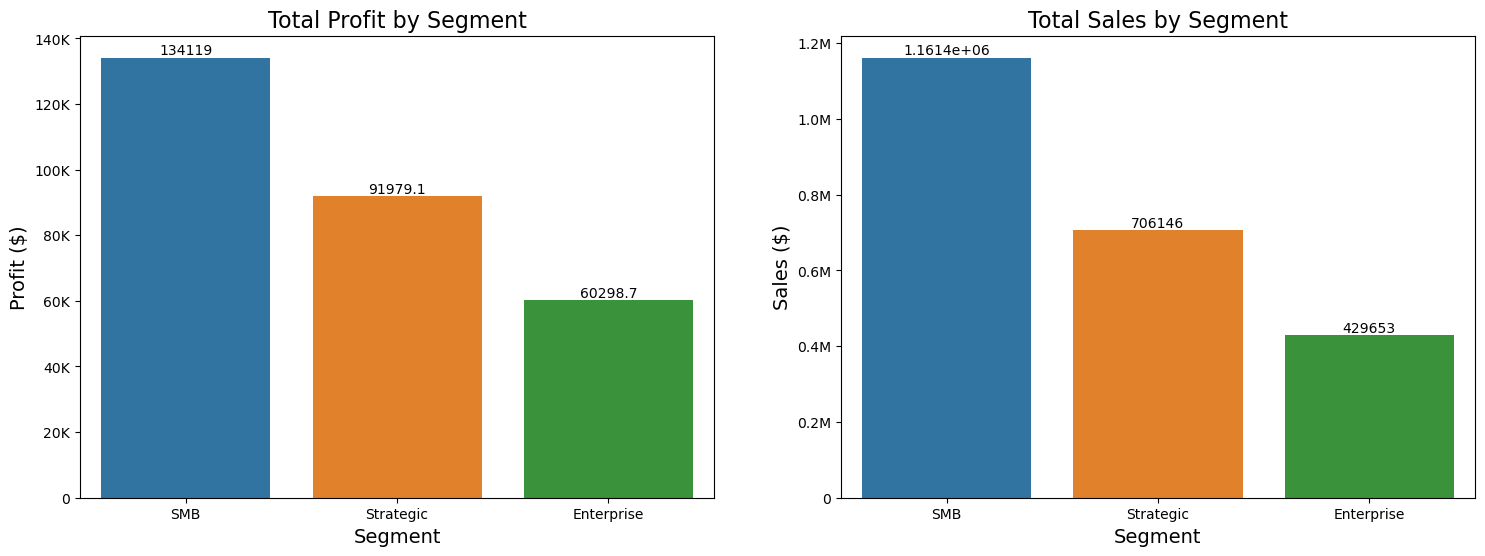

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
total_profit = sns.barplot(
    data= saas,
    x="Segment",
    y="Profit",
    estimator="sum",
    errorbar=None,
    hue="Segment"
)
for i in total_profit.containers:
    plt.bar_label(i)

plt.title("Total Profit by Segment",fontsize=16)
plt.xlabel("Segment", fontsize=14)
plt.ylabel("Profit ($)", fontsize=14)
plt.yticks(ticks=range(0,160000,20000), labels=["0","20K","40K","60K","80K","100K","120K","140K"])

plt.subplot(1,2,2)
total_sales = sns.barplot(
    data= saas,
    x="Segment",
    y="Sales",
    estimator="sum",
    errorbar=None,
    hue="Segment"
)
for i in total_sales.containers:
    plt.bar_label(i)
plt.title("Total Sales by Segment",fontsize=16)
plt.xlabel("Segment", fontsize=14)
plt.ylabel("Sales ($)", fontsize=14)
plt.yticks(ticks=range(0,1400000,200000), labels=["0","0.2M","0.4M","0.6M","0.8M","1.0M","1.2M"])
plt.show()

> insight
- segment pelanggan SMB memiliki volume penjualan dan profit yang sangat tinggi daripada segment lainnya, hal ini kemungkinan terjadi karena memang diskon yang paling sering diberikan ialah kepada SMB sehingga memiliki volume penjualan yang tinggi.

- segment strategic memiliki volume penjualan dan profit yang relatif stabil, namun masih lebih kecil dibandingkan segment SMB, hal ini kemungkinan terjadi karena harganya yang terlalu tinggi dan pemberian diskon yang jarang terhadap segment strategic

- profit dan penjualan yang paling sedikit terdapat pada segment enterprise, hal ini kemungkinan terjadi karena segment pelanggan enterprise memang sedikit dibandingkan dengan segment pelanggan lainnya.


> recommendation 
- fokus pada strategi diskon untuk meningkatkan penjualan di segment SMB, karena pelanggannya yang sangat banyak
- evaluasi strategi harga untuk segment Strategic, agar profitnya lebih menguntungkan, dan juga pemberian diskon yang sesuai dan tidak merugikan agar potensi profit dan volume penjualan meningkat
- lakukan strategi pemasaran untuk segment enterprise

*mari kita lihat rata rata sales dan profit di setiap segment* ⇊

### B. Comparison sales and profit by segment in Each Region

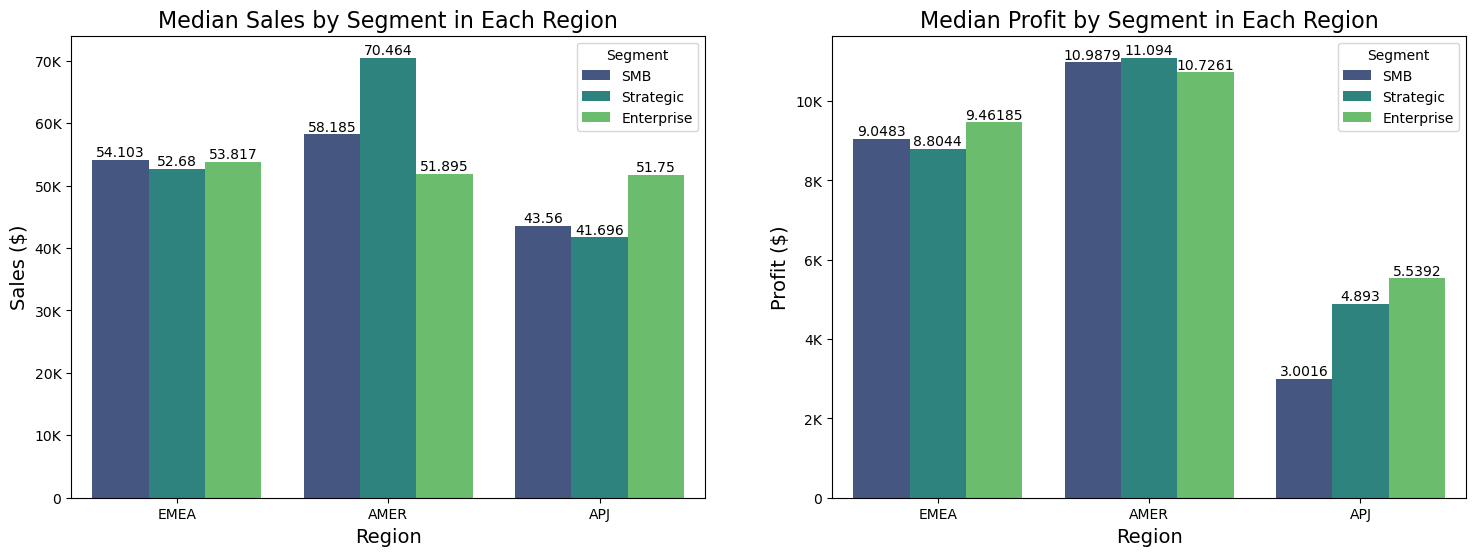

In [25]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
total_profit_segrion = sns.barplot(
    data= saas,
    x="Region",
    y="Sales",
    estimator="median",
    errorbar=None,
    hue="Segment",
    palette="viridis"
)
for i in total_profit_segrion.containers:
    plt.bar_label(i)

plt.title("Median Sales by Segment in Each Region",fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Sales ($)", fontsize=14)
plt.yticks(ticks=range(0,80,10), labels=["0","10K","20K","30K","40K","50K","60K","70K"])

plt.subplot(1,2,2)
total_profit_segrion = sns.barplot(
    data= saas,
    x="Region",
    y="Profit",
    estimator="median",
    errorbar=None,
    hue="Segment",
    palette="viridis"
)

for i in total_profit_segrion.containers:
    plt.bar_label(i)

plt.title("Median Profit by Segment in Each Region",fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Profit ($)", fontsize=14)
plt.yticks(ticks=range(0,12,2), labels=["0","2K","4K","6K","8K","10K"])

plt.show()

> insight 
- AMER memiliki rata rata penjualan dan profit yang sangat tinggi di bandingkan wilayah lainnya, hal ini kemungkinan terjadi karena strategi diskon yang diberikan kepada wilayah AMER sangat optimal, dan juga wilayah AMER termasuk kategori wilayah yang maju, dan semua segment pun terlihat stabil dan juga bagus untuk profit dan volume penjualannya, segment strategic yang lebih bagus di wilayah ini

- EMEA juga memiliki rata rata penjualan dan profit yang relatif stabil (normal), hal ini kemungkinan terjadi karena strategi diskon dan harga yang diberikan kepada wilayah EMEA sudah optimal, dan juga untuk setiap segmentnya terlihat stabil, dan segment Enterprise yang paling menguntungkan di wilayah ini 

- APJ merupakan wilayah yang paling sedikit rata rata penjualan dan profitnya, hal ini kemungkinan terjadi karena strategi diskon dan juga harga yang diberikan kurang optimal, dan juga segment di wilayah ini yang paling menguntungkan ialah segment Enterprise dari segi profit dan volume penjualannya sangat bagus untuk wilayah ini

> recommendation 
- pada wilayah AMER fokuskan strategi pemasaran dan harga (pemberian diskon) disemua segment karena semua segment menghasilkan keuntungan yang lebih baik.

- pada wilayah EMEA strategi pemasaran dan diskon sudah bagus, tapi harus lebih di fokuskan hanya di segment Enterprise, karena ini yang paling menguntungkan.

- pada wilayah APJ fokuskan juga strategi pemasaran dan diskon, di segment Enterprise

- jangan terlalu sering memberikan diskon yang terlalu tinggi untuk segment SMB di wilayah APJ

### C. Conclusion and recommendation

> Conclusion
- perbandingan antar segment
    - segment SMB memiliki volume penjualan dan profit yang tinggi dibandingkan dengan segment lainnya,
    - segment Strategic volume penjualan dan profitnya relatif stabil,
    - segment Enterprise memiliki volume penjualan dan profit yang sedikit dibandingkan dengan segment lainnya

- perbandingan antar segment disetiap wilayah
    - wilayah EMEA memiliki rata rata penjualan dan profit yang stabil (normal) disemua segment, dan yang paling berkontribusi ialah segment Enterprise
    - wilayah AMER memiliki rata rata penjualan dan profit yang paling tinggi untuk semua segment dari region lainnya, dan yang paling tinggi volume penjualannya ialah segment Strategic
    - wilayah APJ yang paling sedikit volume penjualan dan profitnya dari region lainnya, dan yang paling berkontribusi untuk wilayah ini ialah segment Enterprise

> Recommendation 
- usahakan fokus pada strategi diskon 0-20% terhadap segment SMB
- optimalkan strategi pemasaran dan diskon terhadap segment Strategic
- fokuskan strategi pemasaran untuk segment Enterprise di semua wilayah, karena hanya segment inilah yang paling menguntungkan.
- jangan terlalu sering memberikan diskon tinggi (>20%) untuk segment SMB di wilayah APJ


## 3. Apakah ada tren musiman dalam volume penjualan ,dan bagaimana strateginya?

### A. Check Correlation

In [26]:
korelasi = saas[["Profit","Sales"]].corr(method="spearman")
korelasi

,Profit,Sales
Profit,1.000000,0.518407
Sales,0.518407,1.000000


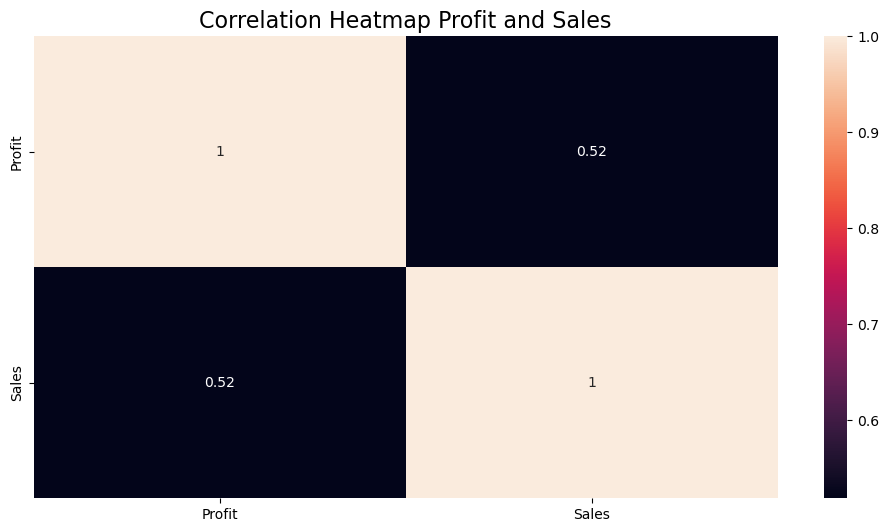

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(korelasi,annot=True)
plt.title("Correlation Heatmap Profit and Sales",fontsize=16)
plt.show()

> Correlation

- 0 - 0.2   : very weak
- 0.2 - 0.4 : weak
- 0.4 - 0.6 : moderate
- 0.6 - 0.9 : strong
- 0.9 - 1   : very strong


> korelasi sales dengan profit: 0.52 (korelasi positif moderat)
- peningkatan sales cenderung berhubungan dengan peningkatan profit, artinya semakin besar sales yang didapatkan maka semakin besar profit yang dihasilkan, begitu juga sebaliknya.

*kita cek apakah sales meningkat dari waktu ke waktu?* ⇊

### B. Check if sales have increased year over year

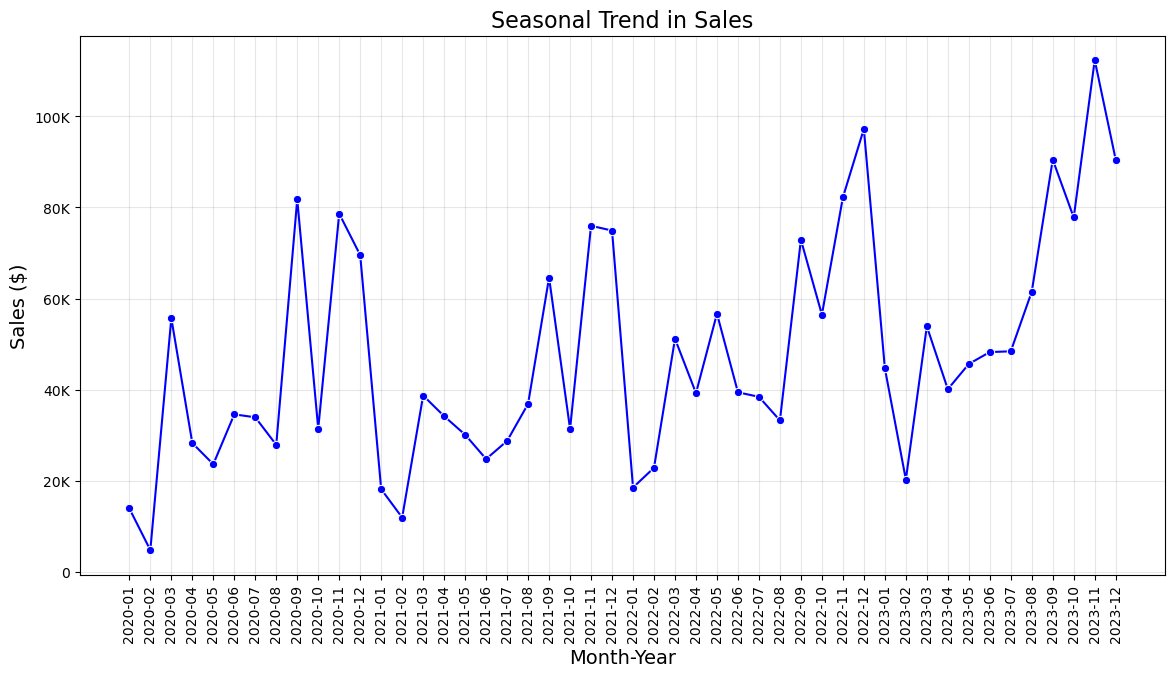

In [28]:
year_month_sales = saas.groupby(saas['Order Date'].dt.to_period('M'))['Sales'].sum()
year_month_sales = year_month_sales.reset_index()
year_month_sales['Order Date'] = year_month_sales['Order Date'].astype(str)


plt.figure(figsize=(14, 7))

sns.lineplot(
    data=year_month_sales, 
    x='Order Date', 
    y='Sales', 
    marker='o', 
    color='blue'
)

plt.title('Seasonal Trend in Sales',fontsize=16)
plt.ylabel('Sales ($)', fontsize=14)
plt.xlabel('Month-Year', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(ticks=range(0,120000,20000), labels=["0","20K","40K","60K","80K","100K"])
plt.grid(alpha=0.3)
plt.show()

> insight 
- pada grafik tersebut sales relatif meningkat setiap tahunnya, ini menunjukan bahwa strategi pemasaran cukup baik, akan tetapi pada dalam 1 tahun tersebut ada bulan yang mana volume penjualan mengalami nilai rendah, dan itu terjadi di setiap tahun

*mari kita lihat apakah semua segment naik dari waktu ke waktu*

#### B1. Check if sales have increased over time by segment

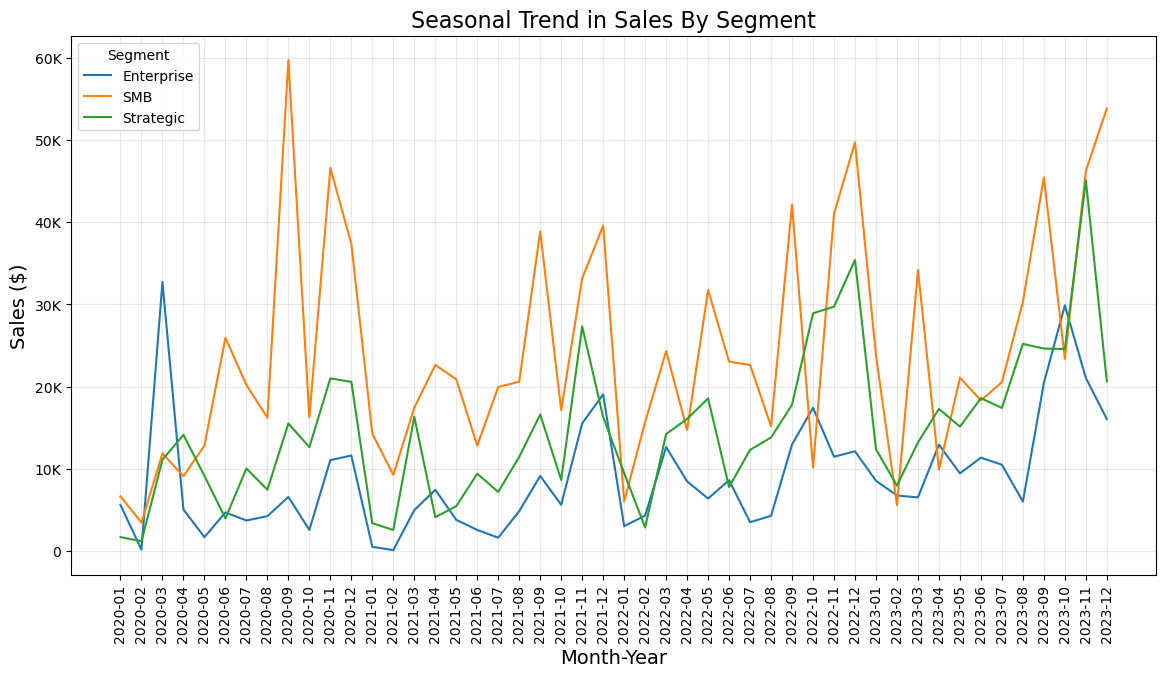

In [29]:
year_month_sales = saas.groupby([saas['Order Date'].dt.to_period('M'),"Segment"])['Sales'].sum()
year_month_sales = year_month_sales.reset_index()
year_month_sales['Order Date'] = year_month_sales['Order Date'].astype(str)


plt.figure(figsize=(14, 7))

sns.lineplot(
    data=year_month_sales, 
    x='Order Date', 
    y='Sales',  
    hue="Segment"
)

plt.title('Seasonal Trend in Sales By Segment',fontsize=16)
plt.ylabel('Sales ($)', fontsize=14)
plt.xlabel('Month-Year', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(ticks= range(0,70000,10000), labels=["0","10K","20K","30K","40K","50K","60K"])
plt.grid(alpha=0.3)
plt.show()

> insight 
- pada grafik tersebut terlihat bahwa semua segment dari tahun ke tahun relatif meningkat, kecuali pada segment enterprise, segment enterprise hanya meningkat di awal tahun saja, tahun setelahnya tidak ada peningkatan, hal ini terjadi karena mungkin kurangnya strategi pemasaran pada segment enterprise

> Recommendation
- fokus pada strategi pemasaran pada segment enterprise

*selanjutnya mari kita lihat apakah volume penjualan dari berbagai region meningkat dari waktu ke waktu* ⇊

#### B2. Check if sales have increased year over year by region

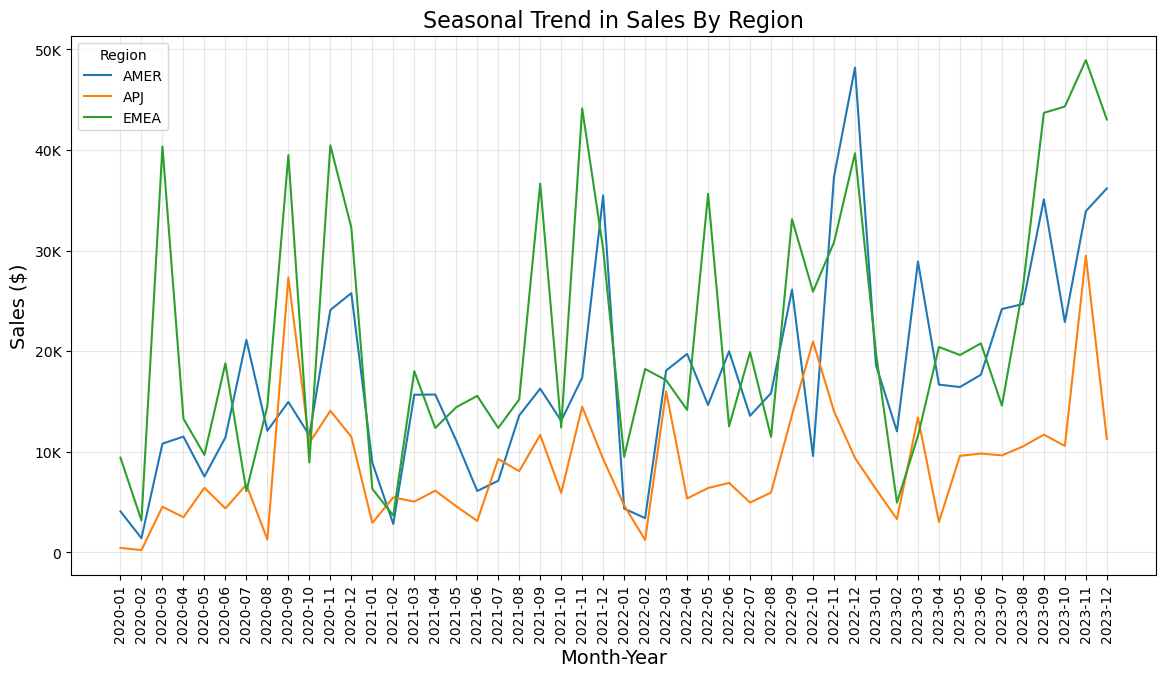

In [30]:
year_month_sales = saas.groupby([saas['Order Date'].dt.to_period('M'),"Region"])['Sales'].sum()
year_month_sales = year_month_sales.reset_index()
year_month_sales['Order Date'] = year_month_sales['Order Date'].astype(str)


plt.figure(figsize=(14, 7))

sns.lineplot(
    data=year_month_sales, 
    x='Order Date', 
    y='Sales', 
    hue="Region"
)

plt.title('Seasonal Trend in Sales By Region',fontsize=16)
plt.ylabel('Sales ($)', fontsize=14)
plt.xlabel('Month-Year', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(ticks= range(0,60000,10000), labels=["0","10K","20K","30K","40K","50K"])
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

> insight
- Wilayah AMER dan EMEA memiliki volume penjualan yang meningkat dari waktu ke waktu
- Wilayah APJ memiliki volume penjualan yang kurang baik dari waktu ke waktu, ini kemungkinan terjadi karena kurangnya strategi pemasaran di Wilayah tersebut

> Recommendation
- lakukan strategi khusus pada region APJ seperti sering memberikan diskon pada rentang 0-20%, atau lakukan bundling product dengan harga yang bikin menarik perhatian pelanggan

*selanjutnya mari kita lihat sales dan profit apakah meningkat pada waktu ke waktu* ⇊

#### B3. Check if sales and profit have increased over time by Discount

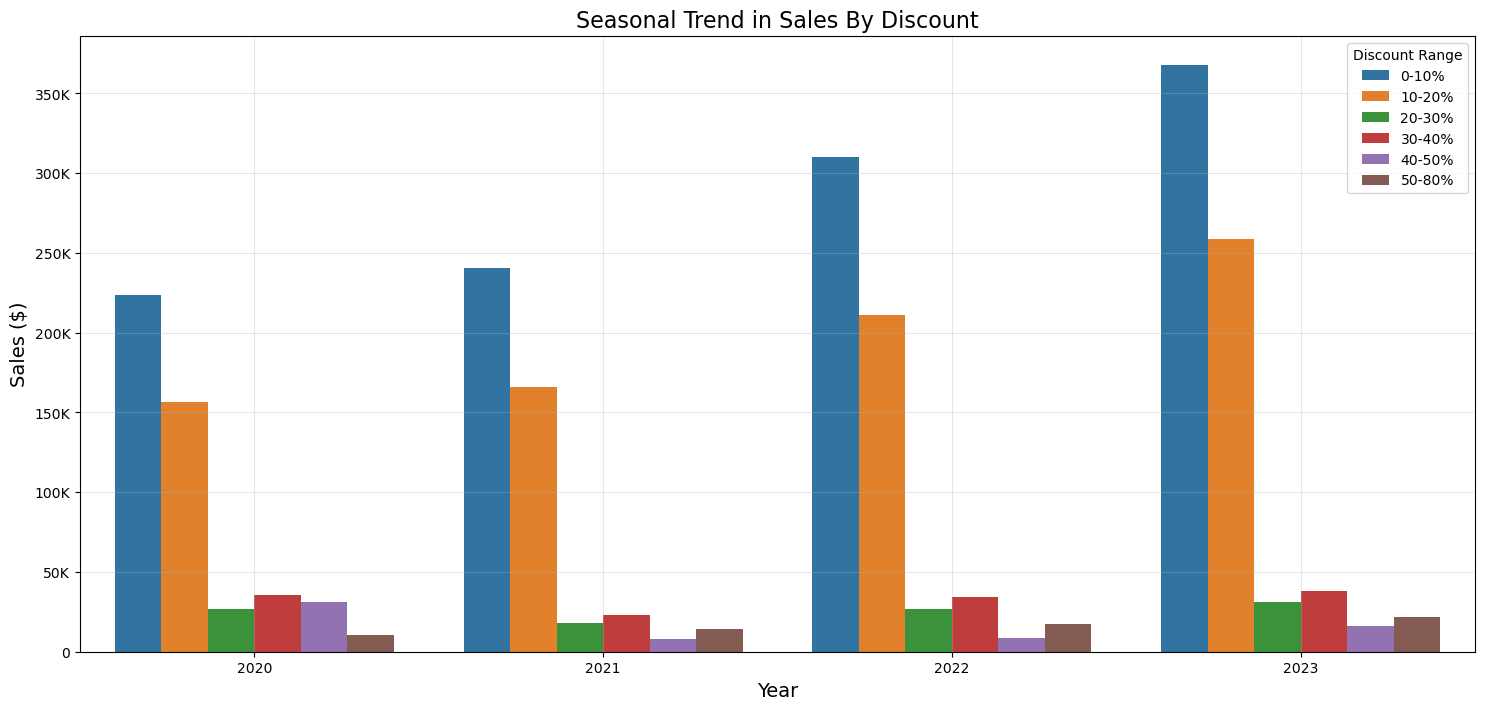

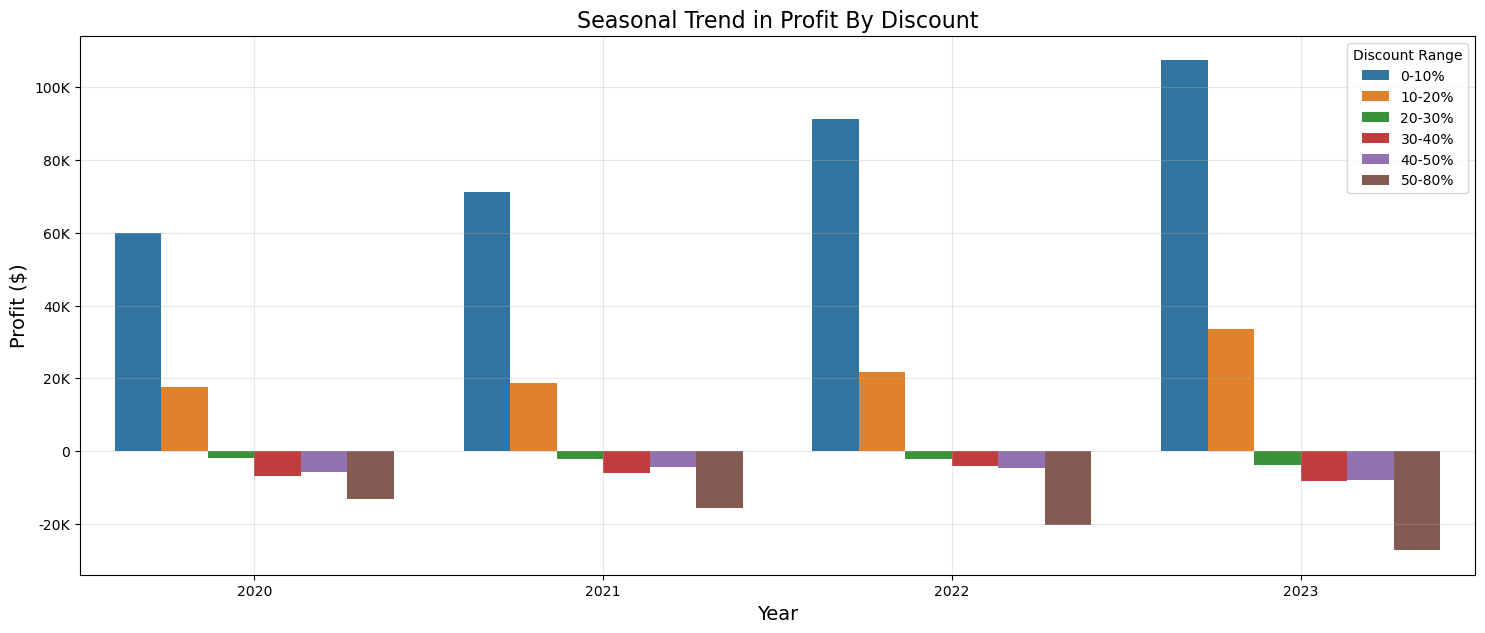

In [31]:
year_sales = saas.groupby(["Year","Discount Range"])[['Sales',"Profit"]].sum()
year_sales = year_sales.reset_index()


plt.figure(figsize=(18, 8))

a = sns.barplot(
    data=year_sales, 
    x='Year', 
    y='Sales', 
    hue="Discount Range"
)

plt.title('Seasonal Trend in Sales By Discount',fontsize=16)
plt.ylabel('Sales ($)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.yticks(ticks=range(0,400000,50000), labels=["0","50K","100K","150K","200K","250K","300K","350K"])
plt.grid(alpha=0.3)


plt.figure(figsize=(18, 7))
sns.barplot(
    data=year_sales, 
    x='Year', 
    y='Profit', 
    hue="Discount Range"
)

plt.title('Seasonal Trend in Profit By Discount',fontsize=16)
plt.ylabel('Profit ($)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.yticks(ticks=range(-20000,120000,20000), labels=["-20K","0","20K","40K","60K","80K","100K"])

plt.grid(alpha=0.3)
plt.show()

> insight
- dari 2 grafik tersebut kita bisa lihat bahwa hanya garis yang berwarna biru (0-10%) dan garis yang berwarna orange (10-20%) mengalami volume penjualan dan profit yang sangat stabil dari tahun ke tahun, ini menunjukan bahwa pemberian diskon yang efektif berada di rentang 0-10% & 0-20%.
- sisanya tidak stabil, dan juga mengalami kerugian

> recommendation
- fokus pada rentang diskon yang menunjukan profit yang terbaik , yaitu pada rentang diskon 0-20%

*mari kita lihat pada bulan apa sajakah yang mengalami profit rendah* ⇊

#### B4. Check profit and sales trends for specific months

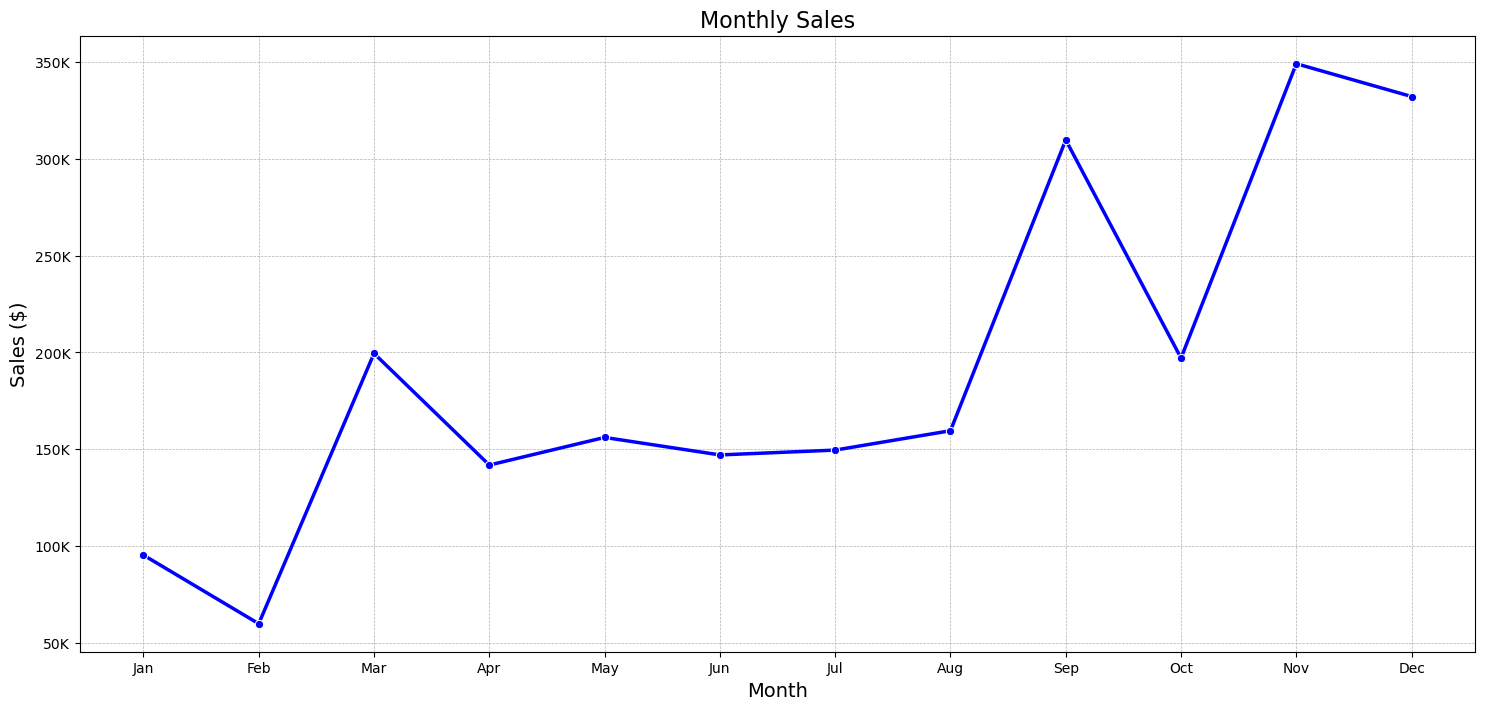

In [32]:
plt.figure(figsize=(18, 8))

m = sns.lineplot(
    data=saas,
    x="Month",
    y="Sales",
    errorbar=None,
    estimator="sum",
    color='blue',
    marker= "o",
    linewidth = 2.5  
)

plt.title("Monthly Sales", fontsize=16)  
plt.xlabel("Month", fontsize=14)  
plt.ylabel("Sales ($)", fontsize=14)  
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.yticks(range(50000,400000,50000), labels=["50K","100K","150K","200K","250K","300K","350K"])
plt.grid(True, linestyle='--', linewidth=0.5)  



> insight 
- pada bulan (Januari,Februari, dan April sampai Agustus) volume penjualan mendapatkan nilai yang lebih sedikit dibandingkan volume penjualan yang terdapat pada bulan (Maret, dan September sampai Desember), kemungkinan ini terjadi karena pada bulan tersebut memasuki periode awal tahun

- pada bulan Maret volume penjualan meningkat dibandingkan bulan sebelumnya, dan pada bulan September sampai Desember volume penjualan meningkat lagi secara signifikan, hal ini kemungkinan terjadi karena bulan tersebut memasuki periode akhir tahun, sehingga penjualan meningkat, dikarenakan mungkin promosi di akhir tahun lebih menarik banyak pembeli.

> Recommendation
- lakukan strategi promosi pada bulan (Maret, dan September sampai Desember), pada bulan tersebut sangat efektif untuk melakukan promosi, seperti bundle dll.
- lakukan kampanye pemasaran dan strategi promosi yang khusus, pada bulan (Januari,Februari, dan April sampai Agustus) untuk meningkatkan volume penjualan,seperti bekerja sama dengan brand ataupun melakukan pengiklanan digital ataupun bundle,dan juga manfaatkan media sosial.

# **9. Conclusion & Recommendation**

> Conclusion
- Dari analisis yang telah dilakukan, kesimpulan tentang pemberian diskon yang efektif:
    - transaksi paling menguntungkan berada pada rentang diskon (0-20%), selebihnya transaksi tersebut Unprofitable
    - Segment SMB paling sering diberikan diskon, dan volume penjualan serta profit-nya juga optimal.
    - Diskon yang diberikan tidak selalu mempengaruhi volume penjualan.
    - Diskon yang diberikan akan mempengaruhi profit.
- segment yang paling berkontribusi besar terhadap penjualan dan profit:
    - segment SMB memiliki volume penjualan dan profit yang paling tinggi
    - segment Strategic volume penjualan dan profit relatif normal disemua wilayah
    - segment Enterprise memiliki volume penjualan dan profit yang sedikit
    - segment Enterprise yang paling berkontribusi besar terhadap profit di semua region (wilayah)
- tren musiman yang menghasilkan volume penjualan terbaik terjadi pada bulan:
    - volume penjualan meningkat dari tahun 2020 sampai tahun 2023.
    - ada kenaikan yang signifikan pada bulan Maret, September sampai desember.
    - volume penjualan rendah pada bulan (Januari,Februari, dan April sampai Agustus)

> Recommendation

*Yang bisa dilakukan oleh tim digital marketing*

1. Strategi Diskon: 
- fokus pada diskon yang memberikan hasil yang terbaik, hasil analisis diatas menunjukan bahwa diskon 0-10% dan 10-20% menghasilkan peningkatan penjualan dan juga keuntungan yang sangat baik, pertimbangkan hal ini untuk memberikan diskon pada rentang ini lebih sering dilakukan.
- jangan terlalu sering memberikan diskon pada rentang yang lebih dari 20%, karena dapat menghasilkan kerugian

2. Segment pelanggan berdasarkan wilayah: 
- tetapkan diskon pada rentang 0-20% pada segment SMB di wilayah APJ.
- fokuskan pemberian diskon pada rentang 0-20% pada segment Enterprise di semua wilayah, karena segment Enterprise yang memiliki kontribusi yang sangat besar bagi profit, dan jangan terlalu sering memberikan diskon yang lebih dari 20%
- tingkatkan strategi pemasaran pada segment enterprise, dan juga segment Strategic
- fokuskan pemberian diskon pada rentang 0-20% pada segment Strategic, dan jangan terlalu sering memberikan diskon yang lebih dari 20%

3. Strategi kampanye pemasaran: 
- lakukan strategi promosi pada bulan maret dan menjelang akhir tahun (September - Desember), dan perbanyak juga stock pada bulan tersebut
- lakukan pemasaran dan promosi khusus pada bulan (Januari,Februari, dan April sampai Agustus), seperti (bekerja sama dengan brand, ataupun pengiklanan digital, ataupun melakukan bundling tiap product dll.) dan juga manfaatkan media sosial